In [2]:
#Importing packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#creating the model based on feature matrix and optimal beta coeficients
def betaAndYtildeGenerator(X_train,y_train):
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    ytilde = X_train @ beta
    return beta,ytilde


In [4]:
#Setting up the Feature matrix
def X_generator(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)  # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X


In [5]:
# split in training and test data
def traningDataGenerator(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 11)
    return X_train, X_test, y_train, y_test

In [6]:
#Functions for R2 and MSE
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [7]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

In [16]:
#Function for generating noise
def noiseGeneration(z_input, scaling = 1):
    np.random.seed(5)
    nosyZ= z_input + np.random.randn(*z_input.shape) * scaling
    return nosyZ

In [9]:
#Fuction for making x and y of given size
def makeData(n_size=20):
    x = np.linspace(0,1,n_size)
    y = np.linspace(0,1,n_size)
    return x,y

In [132]:
N = 20 #data size
x, y = makeData(N)
z = FrankeFunction(x, y)
z = noiseGeneration(z,0.1)

#creating lists
R2_test = []
R2_train = []
R2_test_scaled = []
R2_train_scaled = []
MSE_test = []
MSE_train = []
MSE_test_scaled = []
MSE_train_scaled = []
numOfPoly_index = []
beta_index = []
beta_index_scaled = []
numOfPoly_max = 5
#for loop for number of polynomials
for i in range(numOfPoly_max +1 ):
    numOfPoly = i  
    X = X_generator(x,y, numOfPoly)
    X_train, X_test, y_train, y_test = traningDataGenerator(X,z)
    
    #scaling the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled[:,0] = X_train_scaled[:,0] +1 #do this to fix intercept
    X_test_scaled[:,0] = X_test_scaled[:,0] +1 #do this to fit intercept
    # matrix inversion to find beta
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    beta_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train #scaled
    # and then make the prediction
    ytilde = X_train @ beta
    ytilde_scaled = X_train_scaled @ beta_scaled   #scaled
    ypredict = X_test @ beta
    ypredict_scaled = X_test_scaled @ beta_scaled #scaled
    R2_test.append(R2(y_test,ypredict))
    R2_test_scaled.append(R2(y_test,ypredict_scaled)) #scaled
    R2_train.append(R2(y_train,ytilde))
    R2_train_scaled.append(R2(y_train,ytilde_scaled)) #scaled
    MSE_train.append(MSE(y_train,ytilde))
    MSE_train_scaled.append(MSE(y_train,ytilde_scaled)) #scaled
    MSE_test.append(MSE(y_test,ypredict))
    MSE_test_scaled.append(MSE(y_test,ypredict_scaled)) #scaled
    numOfPoly_index.append(numOfPoly)
    beta_index.append(beta)
    beta_index_scaled.append(beta_scaled) #scaled
     
print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

print("Training MSE_scaled")
print(MSE(y_train,ytilde_scaled))

print("Test MSE_scaled")
print(MSE(y_test,ypredict_scaled))
print(beta_index[0])

Training R2
0.9297110947131236
Training MSE
0.0117184497822705
Test R2
0.8607598194227224
Test MSE
0.02507839449736955
Training MSE_scaled
0.011718449782270695
Test MSE_scaled
0.025078394497221147
[0.41052573]


<Figure size 720x432 with 0 Axes>

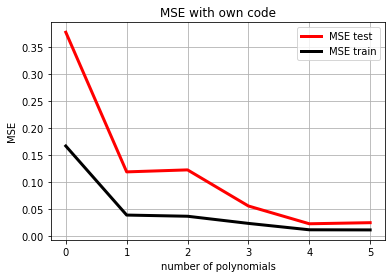

In [130]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.set_xlabel('number of polynomials')
ax.set_ylabel('MSE',color ="black")
ax.plot(numOfPoly_index,MSE_test ,  label='MSE test',linewidth=3.0, c= "red")
ax.plot(numOfPoly_index,MSE_train ,label="MSE train",linewidth=3.0, c= "black")
plt.title("MSE with own code")
plt.grid()

leg = ax.legend();

<Figure size 720x432 with 0 Axes>

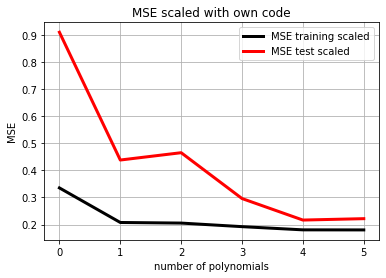

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.set_xlabel('number of polynomials')
ax.set_ylabel('MSE',color ="black")
ax.plot(numOfPoly_index,MSE_train_scaled ,  label='MSE training scaled',linewidth=3.0, c= "black")
ax.plot(numOfPoly_index,MSE_test_scaled ,label="MSE test scaled",linewidth=3.0, c= "red")
ax.set_title('MSE scaled with own code')
plt.grid()

leg = ax.legend();

In [176]:
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
scaler = StandardScaler()

N = 20 #data size
x, y = makeData(N)
z = FrankeFunction(x, y)
z = noiseGeneration(z,0.1)
max_degree = input("enter the max degree:")
max_degree = int(max_degree)
print("max degree is :",max_degree)

max_degree = np.arange(0,max_degree + 1)
MSE_train = []
MSE_test = []
numOfPoly_index = []
beta_foef = []
beta_foef_scaled = []
for degree in (max_degree):
    X = X_generator(x,y, degree)
    X_train, X_test, y_train, y_test = traningDataGenerator(X,z)
    
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #X_train_scaled[:,0] = X_train_scaled[:,0]+1 #can do thsi and set fit intercept to false. 
    #X_test_scaled[:,0] = X_test_scaled[:,0]+1
    
    poly_reg_model = linear_model.LinearRegression(fit_intercept = False)
    poly_reg_model_s = linear_model.LinearRegression(fit_intercept = True) # Can have fit intercept = True for scaled model 
    poly_reg_model.fit(X_train, y_train)
    poly_reg_model_s.fit(X_train_scaled, y_train)
    
    y_tilde_scaled = poly_reg_model_s.predict(X_train_scaled)
    y_pred_scaled = poly_reg_model_s.predict(X_test_scaled)
    
    y_tilde = poly_reg_model.predict(X_train)
    y_pred = poly_reg_model.predict(X_test)
    
    MSE_train.append(mean_squared_error(y_train, y_tilde))
    MSE_test.append(mean_squared_error(y_test, y_pred))
    numOfPoly_index.append(degree)
    beta_foef.append(poly_reg_model.coef_)
    beta_foef_scaled.append(poly_reg_model_scaled.coef_)
    print(degree)


# The coefficients
print("Coefficients: \n", poly_reg_model.coef_.shape)
print("Intercept scaled: \n", poly_reg_model_s.intercept_)
print("Intercept: \n", poly_reg_model.intercept_)


print(" MSE training : \n",mean_squared_error(y_tilde, y_train))
print(" MSE test : \n",mean_squared_error(y_test, y_pred))

print(" MSE training_scaled : \n",mean_squared_error(y_tilde_scaled,y_train))
print(" MSE test_scaled : \n",mean_squared_error(y_test, y_pred_scaled))

X_test_scaled.shape


enter the max degree:5
max degree is : 5
0
1
2
3
4
5
Coefficients: 
 (21,)
Intercept scaled: 
 0.4105257344398409
Intercept: 
 0.0
 MSE training : 
 0.011718449782270499
 MSE test : 
 0.02507839449719575
 MSE training_scaled : 
 0.011718449782270698
 MSE test_scaled : 
 0.025078394497195355


(4, 21)

<Figure size 720x432 with 0 Axes>

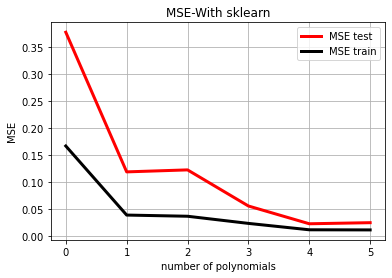

In [118]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.set_xlabel('number of polynomials')
ax.set_ylabel('MSE',color ="black")
ax.plot(numOfPoly_index,MSE_test ,  label='MSE test',linewidth=3.0, c= "red")
ax.plot(numOfPoly_index,MSE_train ,label="MSE train",linewidth=3.0, c= "black")
plt.title("MSE-With sklearn")
plt.grid()

leg = ax.legend();


<Figure size 720x432 with 0 Axes>

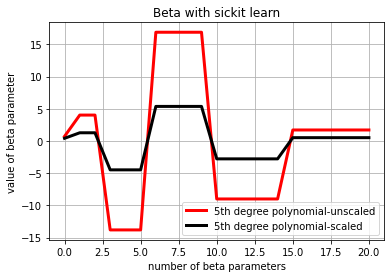

In [177]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
ax.set_xlabel('number of beta parameters')
ax.set_ylabel('value of beta parameter',color ="black")
ax.plot(beta_foef[5] ,  label='5th degree polynomial-unscaled',linewidth=3.0, c= "red")
ax.plot(beta_foef_scaled[5] ,label="5th degree polynomial-scaled",linewidth=3.0, c= "black")
plt.title("Beta with sickit learn")
plt.grid()

leg = ax.legend();


In [156]:
(beta_foef_scaled)

[array([0.]),
 array([ 0.       , -0.1785829, -0.1785829]),
 array([ 0.        , -0.26341475, -0.26341475,  0.05866484,  0.05866484,
         0.05866484]),
 array([ 0.        ,  0.23967868,  0.23967868, -0.82530922, -0.82530922,
        -0.82530922,  0.42673269,  0.42673269,  0.42673269,  0.42673269]),
 array([ 0.        ,  1.11043777,  1.11043777, -3.61253927, -3.61253927,
        -3.61253927,  3.5784708 ,  3.5784708 ,  3.5784708 ,  3.5784708 ,
        -1.19934577, -1.19934577, -1.19934577, -1.19934577, -1.19934577]),
 array([-3.19522186e-13,  1.27198644e+00,  1.27198644e+00, -4.48967359e+00,
        -4.48967359e+00, -4.48967359e+00,  5.36694714e+00,  5.36694714e+00,
         5.36694714e+00,  5.36694714e+00, -2.78142274e+00, -2.78142274e+00,
        -2.78142274e+00, -2.78142274e+00, -2.78142274e+00,  5.11677498e-01,
         5.11677498e-01,  5.11677498e-01,  5.11677498e-01,  5.11677498e-01,
         5.11677498e-01])]

In [148]:
(beta_foef)

[array([0.41052573]),
 array([ 1.02718887, -0.5646554 , -0.5646554 ]),
 array([ 1.10438773, -0.83288244, -0.83288244,  0.18059066,  0.18059066,
         0.18059066]),
 array([ 0.91773791,  0.75783215,  0.75783215, -2.54058694, -2.54058694,
        -2.54058694,  1.34299605,  1.34299605,  1.34299605,  1.34299605]),
 array([  0.73488489,   3.51105666,   3.51105666, -11.120644  ,
        -11.120644  , -11.120644  ,  11.26202019,  11.26202019,
         11.26202019,  11.26202019,  -3.88579816,  -3.88579816,
         -3.88579816,  -3.88579816,  -3.88579816]),
 array([  0.71471819,   4.02185212,   4.02185212, -13.8207665 ,
        -13.8207665 , -13.8207665 ,  16.89064142,  16.89064142,
         16.89064142,  16.89064142,  -9.01161917,  -9.01161917,
         -9.01161917,  -9.01161917,  -9.01161917,   1.70585158,
          1.70585158,   1.70585158,   1.70585158,   1.70585158,
          1.70585158])]

In [151]:
print(X_test_scaled.shape)
print(X_test.shape)

(4, 21)
(4, 21)
